## Analisis exploratorio de datos

Análisis Univariado
El análisis univariado se centra en el estudio de una sola variable a la vez. Su objetivo es entender la distribución, la tendencia central, la dispersión y la presencia de valores atípicos de esa variable. Los métodos y herramientas utilizados en el análisis univariado varían según el tipo de variable (numérica o categórica).

            Variables Numéricas
Medidas de Tendencia Central:

Media: El promedio de los valores. Mediana: El valor central en una distribución ordenada. Moda: El valor más frecuente en el conjunto de datos. Medidas de Dispersión:

Varianza: La media de las diferencias al cuadrado respecto a la media. Desviación estándar: La raíz cuadrada de la varianza. Rango: La diferencia entre el valor máximo y el mínimo. Percentiles y cuartiles: Valores que dividen la distribución en partes iguales. Gráficos:

Histogramas: Muestran la frecuencia de los valores en intervalos específicos. Boxplots (diagramas de caja): Representan la mediana, cuartiles y posibles valores atípicos. Distribución:

Análisis de la forma de la distribución: Asimetría y curtosis. Pruebas de normalidad: Shapiro-Wilk, Kolmogorov-Smirnov, entre otras.

             Variables Categóricas
Frecuencia:

Tablas de frecuencia: Cuenta de ocurrencias de cada categoría. Porcentajes: Proporción de cada categoría respecto al total. Gráficos:

Gráficos de barras: Visualización de la frecuencia de cada categoría. Gráficos de pastel: Representación proporcional de cada categoría.

Análisis Bivariado
El análisis bivariado estudia la relación entre dos variables. Dependiendo de los tipos de variables (numéricas o categóricas), se utilizan diferentes métodos y herramientas para explorar estas relaciones.

              Variables Numéricas
Correlación:

Coeficiente de correlación de Pearson: Mide la relación lineal entre dos variables numéricas. Coeficiente de correlación de Spearman: Mide la relación monotónica entre dos variables numéricas. Gráficos:

Scatter plots (diagramas de dispersión): Muestran la relación entre dos variables mediante puntos en un plano cartesiano. Heatmaps: Muestran la matriz de correlación de varias variables numéricas. Regresión Lineal:

Análisis de regresión: Modela la relación entre una variable dependiente y una o más variables independientes. Variables Categóricas Tablas de Contingencia:

Tablas cruzadas: Muestran la frecuencia conjunta de dos variables categóricas. Gráficos:

Gráficos de barras apiladas o agrupadas: Visualizan la distribución conjunta de dos variables categóricas. Pruebas Estadísticas:

Chi-cuadrado de independencia: Evalúa si existe una relación significativa entre dos variables categóricas. Variables Mixtas (Numéricas y Categóricas) Boxplots:

Comparan la distribución de una variable numérica entre las diferentes categorías de una variable categórica. Gráficos de violín:

Muestran la distribución de una variable numérica en diferentes categorías de una variable categórica, combinando boxplots y densidad de probabilidad. Análisis de Varianza (ANOVA):

Prueba estadística para comparar las medias de una variable numérica entre varias categorías de una variable categórica.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import shapiro, kstest, norm, skew, kurtosis
import statsmodels.api as sm

sns.set(style = 'darkgrid')
colors = ['#c1121f','#669bbc', '#f4d35e', '#e9724c', '#ffc857']

In [7]:
data = pd.read_csv("D:/Repositorio/Proyecto_ Venta de autos/Data_procecced/car_data.csv")
data.head(2)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0


### 1_Analisis Univariado

In [8]:
col_cat = []
col_num = []
for i in data.columns:
    if data[i].dtypes == "int64":
        col_num.append(i)
    else:
        col_cat.append(i)
print(f"Columnas tipo categorico: {col_cat}")
print(f"Columnas tipo numerico: {col_num}")        


Columnas tipo categorico: ['Gender']
Columnas tipo numerico: ['User ID', 'Age', 'AnnualSalary', 'Purchased']


#### 1_1 Columnas Categoricas

In [9]:
print(f"La varialbe Gender tiene {data['Gender'].nunique()} valores")
Conteo = data["Gender"].groupby(data["Gender"]).count()
porcentaje = data["Gender"].groupby(data["Gender"]).count() / len(data) * 100
tabla = pd.concat([Conteo, porcentaje], axis=1)
tabla.columns = ["Count", "Percentage"]
tabla

La varialbe Gender tiene 2 valores


,Count,Percentage
Gender,,
Female,516,51.6
Male,484,48.4


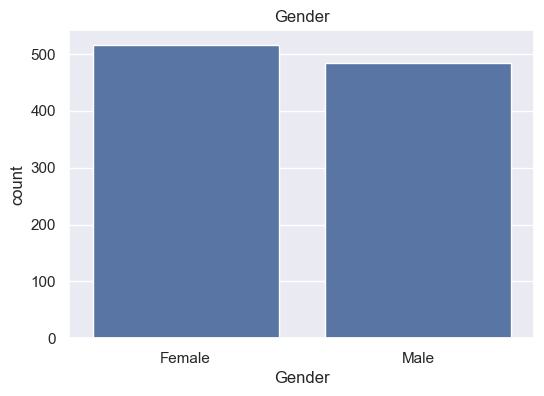

In [13]:

fig, ax = plt.subplots(figsize=(6, 4))

sns.countplot(ax=ax, x="Gender", data=data, order=data["Gender"].value_counts().index)
ax.set_title("Gender")

plt.show()

#### 1_2 Análisis de variables numericas

In [15]:
data.describe(exclude="object").T

,count,mean,std,min,25%,50%,75%,max
User ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,40.106,10.707073,18.0,32.00,40.0,48.00,63.0
AnnualSalary,1000.0,72689.000,34488.341867,15000.0,46375.00,72000.0,90000.00,152500.0
Purchased,1000.0,0.402,0.490547,0.0,0.00,0.0,1.00,1.0


In [16]:
def analize(data):
    results = []
    for column in data.columns:
        col_data = data[column]
        n = len(col_data)
        
        #Coeficiente de asimetria
        Kp = 3 * (np.mean(col_data) - np.median(col_data)) / np.std(col_data)
        Q1, Q3 = np.percentile(col_data, [25, 75])
        Kb = (Q3 + Q1 - 2 * np.median(col_data)) / (Q3 - Q1)
        A3 = skew(col_data)
        
        #Coeficiente de curtosis
        A4 = kurtosis(col_data)
        
        # Pruebas de normalidad
        shapiro_test = shapiro(col_data)
        ks_test = kstest(col_data, 'norm', args=(np.mean(col_data), np.std(col_data)))
        
        results.append([
            column,
            Kp, Kb, A3,
            A4,
            shapiro_test.pvalue, ks_test.pvalue
        ])
        
            # Crear el DataFrame
    columns = pd.MultiIndex.from_tuples([
        ('', 'Variable'),
        ('Prueba de asimetría', 'Pearson Kp'),
        ('Prueba de asimetría', 'Bowley Kb'),
        ('Prueba de asimetría', 'Fisher A3'),
        ('Prueba de curtosis', 'Fisher A4'),
        ('Prueba de normalidad', 'Shapiro-Wilk p-value'),
        ('Prueba de normalidad', 'Kolmogorov-Smirnov p-value')
    ])
    

    results_df = pd.DataFrame(results, columns=columns)
    return results_df

In [17]:
data_numeric = data.select_dtypes(exclude='object')
analize(data_numeric)

Prueba de asimetría                     Prueba de curtosis  \
       Variable          Pearson Kp Bowley Kb Fisher A3          Fisher A4   
0       User ID            0.000000  0.000000  0.000000          -1.200002   
1           Age            0.029715  0.000000  0.078569          -0.645593   
2  AnnualSalary            0.059963 -0.174785  0.467532          -0.493460   
3     Purchased            2.459709  1.000000  0.399754          -1.840197   

  Prueba de normalidad                             
  Shapiro-Wilk p-value Kolmogorov-Smirnov p-value  
0         5.388678e-17               2.456679e-03  
1         1.060151e-08               2.441613e-02  
2         1.234916e-15               3.155090e-04  
3         3.818204e-42              7.347710e-139

In [18]:
data_numeric = data.select_dtypes(exclude='object')
def analyze_data(data):
    # Iterar sobre cada columna numérica en el DataFrame
    #colors = ['#c1121f','#669bbc', '#f4d35e', '#e9724c', '#ffc857']
    for column in data.select_dtypes(include='number').columns:
        fig, axes = plt.subplots(1, 4, figsize=(15, 5))
        fig.suptitle(f'Análisis de {column}', fontsize=16)
        #Pruebas de Asmetria y coutosis
        mean = data[column].mean()
        median = data[column].median()
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        var = data[column].var()
        std = data[column].std()
        mod = data[column].mode().iloc[0]
        Kp = 3 * (np.mean(data[column]) - np.median(data[column])) / np.std(data[column])
        A4 = kurtosis(data[column])
        # Histograma
        sns.histplot(data[column], bins=30, kde=True, ax=axes[0])
        axes[0].set_title('Histograma')
        axes[0].set_ylabel("")
        axes[0].set_xlabel("")
        axes[0].axvline(x=mean, color = "red", linestyle = "--",
                        label = f"Mean: {round(mean,2)}")
        axes[0].axvline(x = mod, color="#f4d35e", label = f"Mode: {round(mod,2)}")
        axes[0].legend()
        
        # Boxplot
        sns.boxplot(x=data[column], ax=axes[1])
        axes[1].set_title('Diagrama de caja')
        axes[1].set_xlabel("")
        axes[1].axvline(x=median, color= "red", linestyle= "--", label = f"Median: {round(median,2)}")
        axes[1].axvline(x=Q1, color= "#669bbc", label = f"Q1: {round(Q1,2)}")
        axes[1].axvline(x=Q3, color= "#f4d35e", label = f"Q3: {round(Q3,2)}")
        axes[1].legend()
        #kdeplot
        sns.kdeplot(data[column], fill= True,ax=axes[2], color= "#c1121f",
                    label =f"Var:{round(var,2)}\n Std:{round(std,3)}\n Asimetria Kp:{round(Kp,2)} \n Curtosis A4:{round(A4,2)}")
        axes[2].set_title('Kdeplot')
        axes[2].set_ylabel("")
        axes[2].set_xlabel("")
        axes[2].legend()

        
        # Scatter
        sns.scatterplot(x=data[column], y=range(len(data[column])), ax=axes[3])
        axes[3].set_title('Gráfico de dispersión')
        axes[3].set_xlabel("")
        axes[3].set_ylabel('')
        #x=range(len(data[column])), y=data[column]
        axes[3].set_title("Grafico de dispersion")
        # Mostrar los gráficos
        plt.tight_layout()
        plt.show()

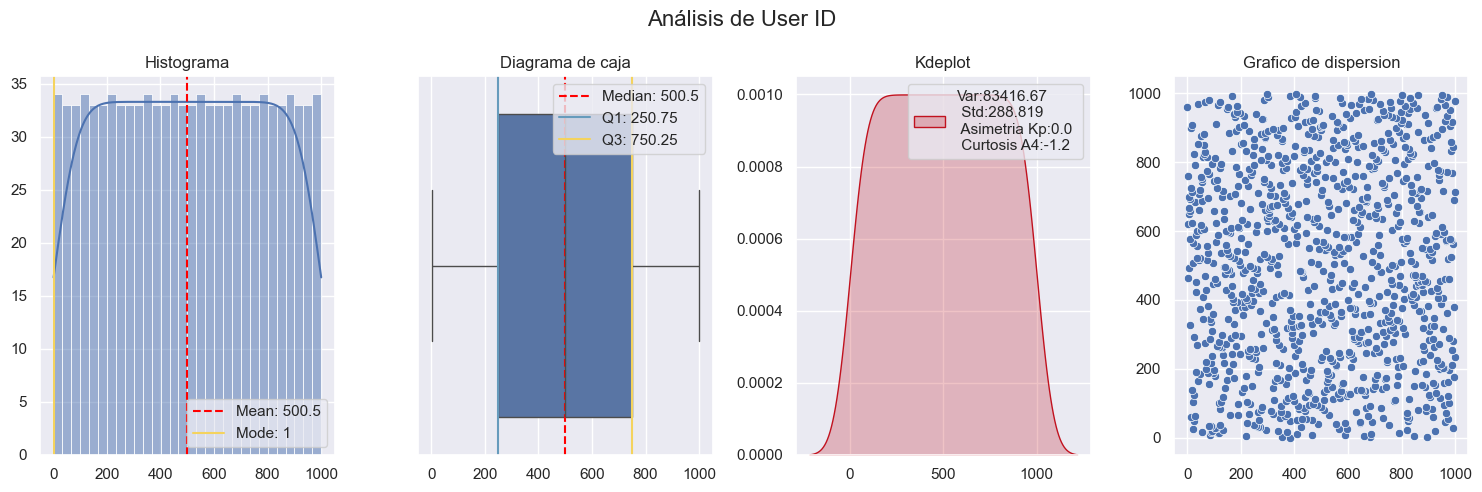

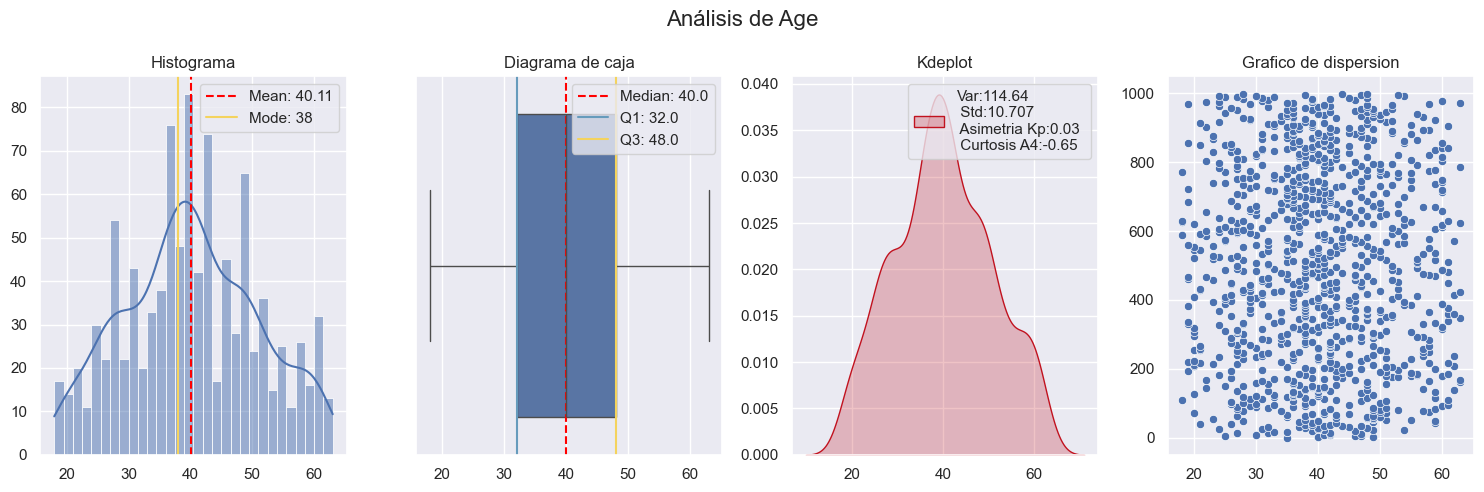

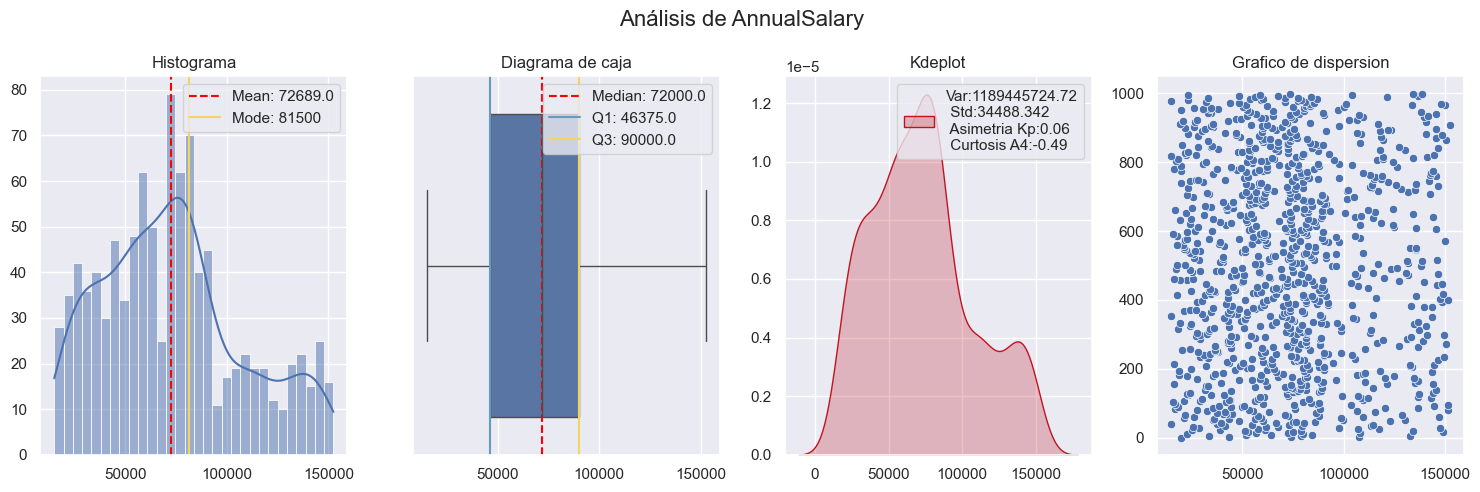

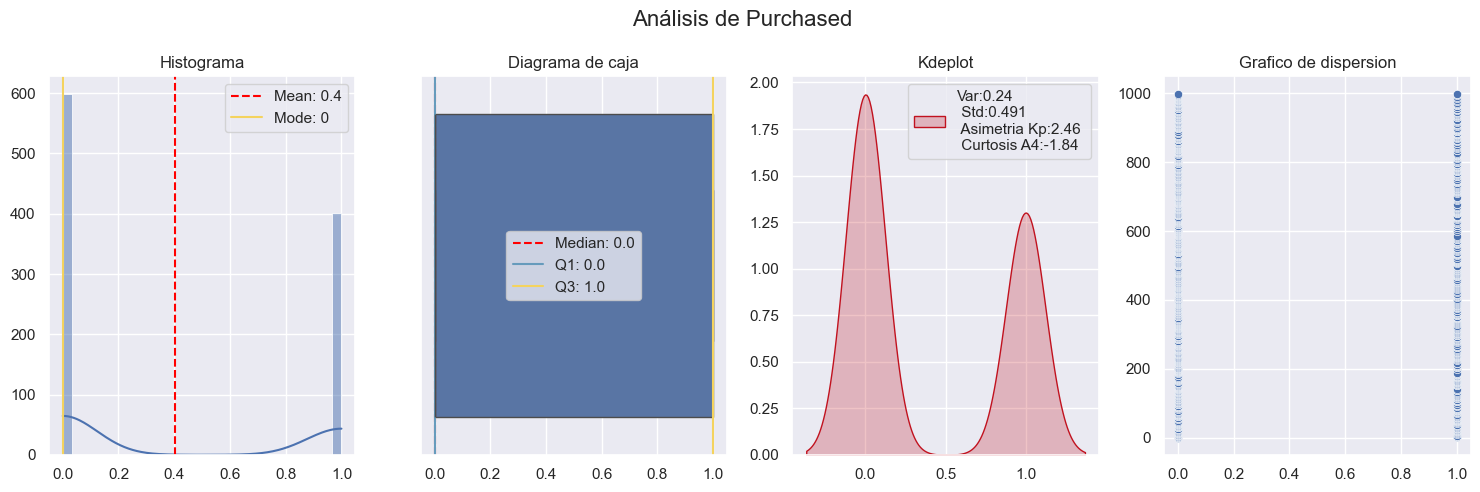

In [21]:
data_p = data[['User ID', 'Age', 'AnnualSalary', 'Purchased']]
data_p = pd.DataFrame(data_p)
analyze_data(data_p)

### 2_ANALISIS BIVARIADO

El análisis bivariado estudia la relación entre dos variables. Dependiendo de los tipos de variables (numéricas o categóricas), se utilizan diferentes métodos y herramientas para explorar estas relaciones. En este proyecto crearemos un analisis para las series de tiempo con la variable de Year, tendremos un apartado especifico en el final para ello. Por esta razon no aremos analisis con la varaible year en las siguientes fases.

#### 2_1 Análisis de datos numericos

In [24]:
col_num = []
col_cat = []
for col in data.columns:
    if data[col].dtypes== "int64":
        col_num.append(col)
    else:
        col_cat.append(col)
        
print(col_cat)
print(col_num)

['Gender']
['User ID', 'Age', 'AnnualSalary', 'Purchased']


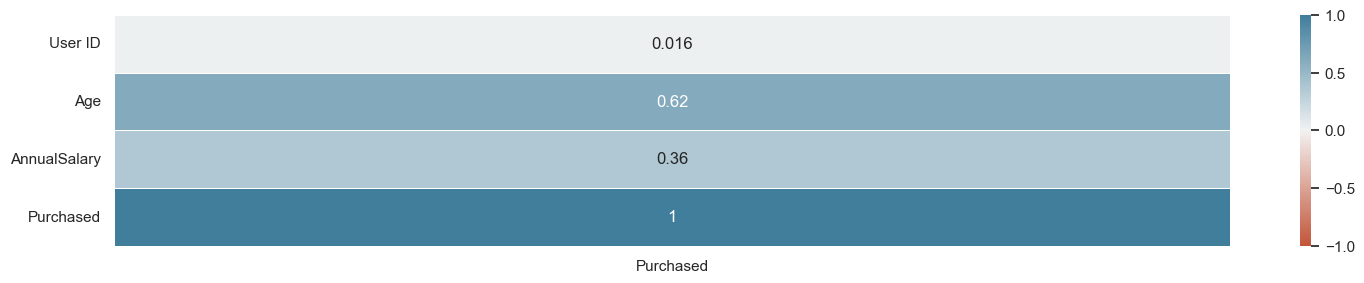

In [27]:
corr_matrix = data_numeric.corr()

# Seleccionar la columna de 'Life expectancy' y convertirla a un DataFrame
corr = corr_matrix[["Purchased"]].copy()

# Configurar la figura del heatmap
plt.figure(figsize=(18, 3))
sns.heatmap(
    data=corr,
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

plt.show()

In [28]:
def calcular_correlacion(data):
    
    # Calcular la correlación de Pearson para cada variable
    correlaciones = data.corr()["Purchased"].drop(labels=["Purchased"])
    df_correlacion = pd.DataFrame(correlaciones)
    
    # Crear un DataFrame con los resultados
    
    # Clasificar la correlación
    def clasificar_correlacion(r):
        if r == 1 or r == -1:
            return 'Correlación perfecta'
        elif 0.9 < r <= 1 or -1 <= r < -0.9:
            return 'Correlación excelente'
        elif 0.8 < r <= 0.9 or -0.9 < r <= -0.8:
            return 'Correlación aceptable'
        elif 0.6 < r <= 0.8 or -0.8 < r <= -0.6:
            return 'Correlación regular'
        elif 0.3 < r <= 0.6 or -0.6 < r <= -0.3:
            return 'Correlación mínima'
        else:
            return 'No hay correlación'

    df_correlacion['Clasificacion/Sperman'] = df_correlacion['Purchased'].apply(clasificar_correlacion)
    
    # Ordenar el DataFrame de mayor a menor correlación absoluta
    df_correlacion = df_correlacion.reindex(df_correlacion['Purchased'].abs().sort_values(ascending=False).index)
    
    return df_correlacion

In [29]:

calcular_correlacion(data_numeric)

,Purchased,Clasificacion/Sperman
Age,0.616036,Correlación regular
AnnualSalary,0.364974,Correlación mínima
User ID,0.015911,No hay correlación


In [32]:
def plot_scatterplot(df, features, title='Features', columns=2, x_lim=None):
    df = df.copy()
    rows = math.ceil(len(features) / columns)
    
    fig, axes = plt.subplots(rows, columns, sharey=True, figsize=(10, 6))
    for i, feature in enumerate(features):
        ax = plt.subplot(rows, columns, i + 1)
        correlation = df[feature].corr(df['Purchased'])
        r_squared = correlation ** 2
        sns.scatterplot(data=df, x=feature, y='Purchased', ax=ax,
                        label = f"corr = {round(correlation, 2)} \n r^2 = {round(r_squared, 2)}")

    
    fig.suptitle(f'{title} x Purchased', fontsize=25, x=0.56)
    fig.tight_layout(rect=[0.05, 0.03, 1, 1])
    
    plt.show()

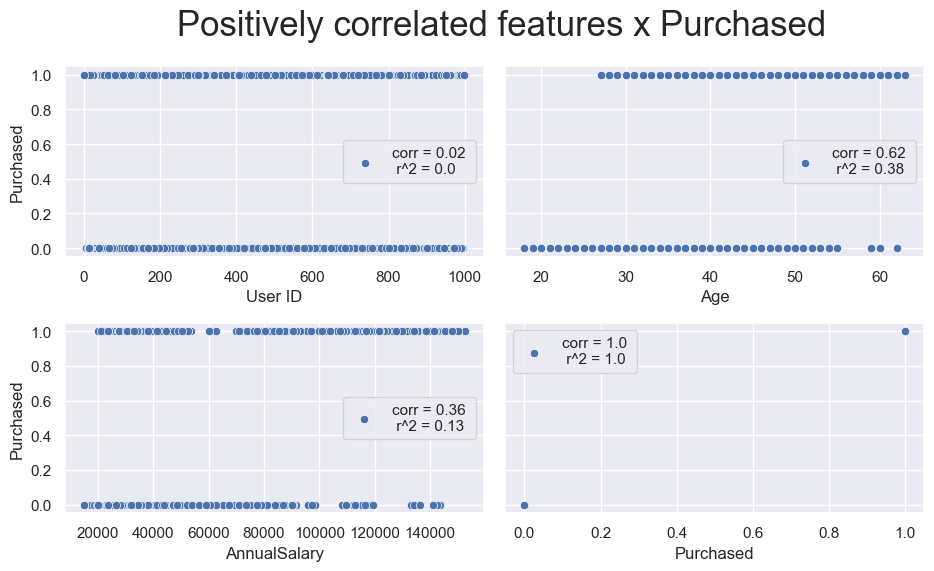

In [35]:
#Plot Life Expectancy x positively correlated features
pos_correlated_features = ['User ID', 'Age', 'AnnualSalary', 'Purchased']

title = 'Positively correlated features'

plot_scatterplot(data, pos_correlated_features, title)

#### 2_2 Analisis de variables categoricas

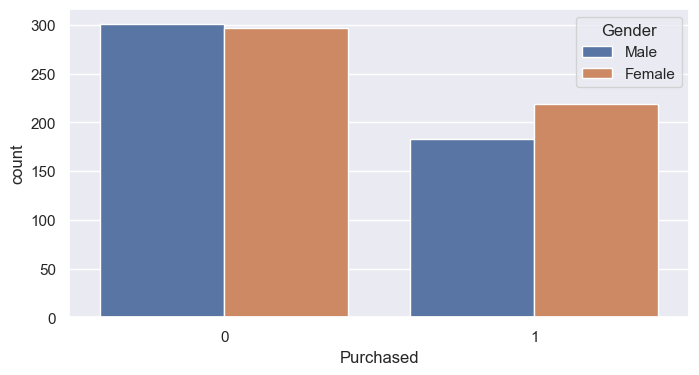

In [38]:
plt.figure(figsize=(8,4))
sns.countplot(data= data, x = "Purchased", hue = "Gender")
plt.xticks(rotation=0)
plt.show()

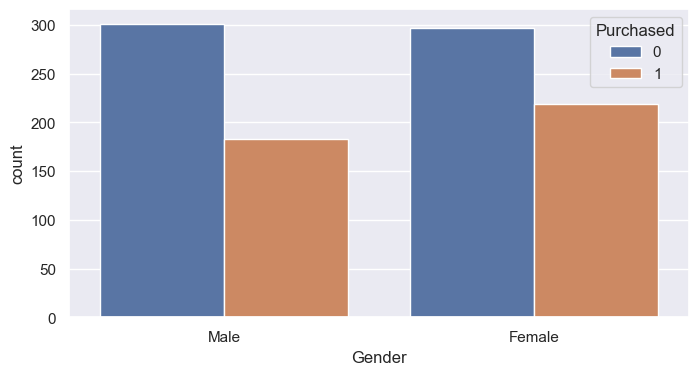

In [41]:
plt.figure(figsize=(8,4))
sns.countplot(data= data, x = "Gender", hue = "Purchased")
plt.xticks(rotation=0)
plt.show()

### 3_Análisis de variables mixtas (numericas y categoricas)

#### 3_1 Analisis de la variable dependiente con una variable  categorica

Variable dependiente con la variable Gender

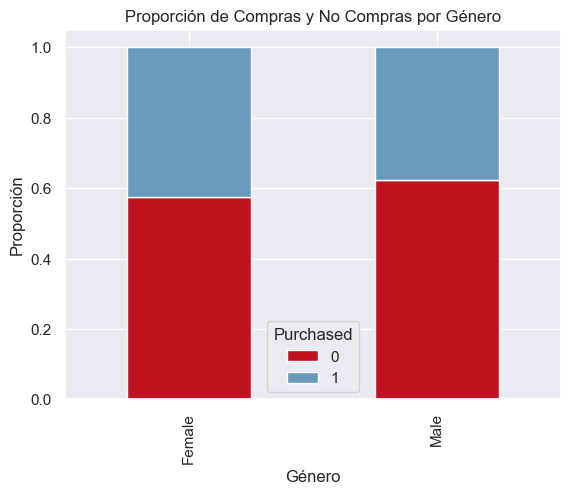

In [55]:
prop_data = pd.crosstab(data['Gender'], data['Purchased'], normalize='index')

# Gráfico apilado de proporciones
prop_data.plot(kind='bar', stacked=True, color=['#c1121f','#669bbc'])
plt.title('Proporción de Compras y No Compras por Género')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='Purchased')
plt.show()

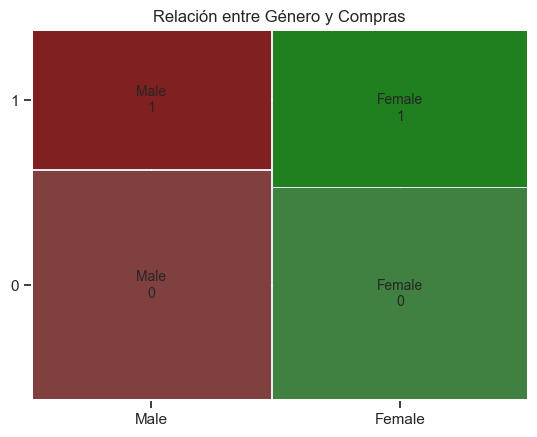

In [57]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
mosaic(data, ['Gender', 'Purchased'], title='Relación entre Género y Compras')
plt.show()

#### 3_2 Analisis de la variable dependiente con una variable  numerica

Variable dependiente con 'User ID', 'Age', 'AnnualSalary

Text(0.5, 0, 'Life expentancy (year)')

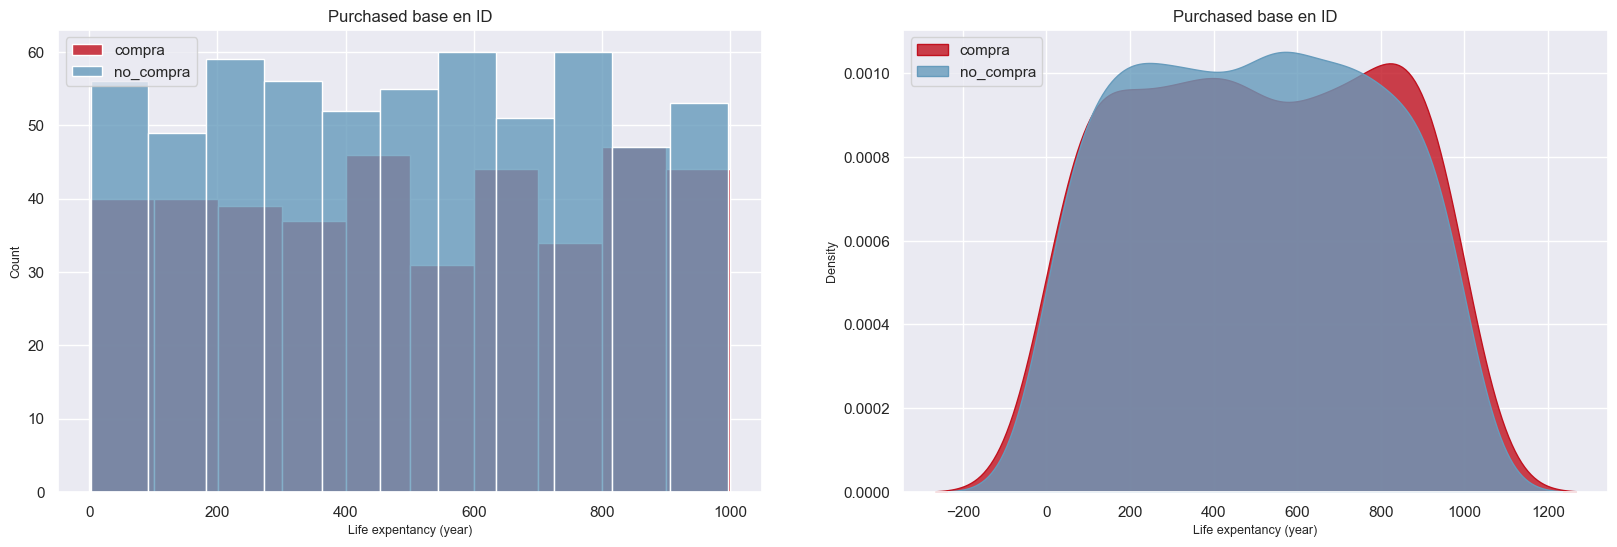

In [58]:
compra = data.loc[data["Purchased"]==1].copy()
no_compra = data.loc[data["Purchased"]==0].copy()

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(compra["User ID"],label="compra",fill=True,color=colors[0],alpha=0.8)
sns.histplot(no_compra["User ID"],label="no_compra",fill=True,color=colors[1],alpha=0.8)
plt.legend(loc = "upper left")
plt.ylabel("Count", fontsize=9)
plt.title("Purchased base en ID")
plt.xlabel("Life expentancy (year)", fontsize = 9)


plt.subplot(1,2,2)
sns.kdeplot(compra["User ID"],label="compra",fill=True,color=colors[0],alpha=0.8)
sns.kdeplot(no_compra["User ID"],label="no_compra",fill=True,color=colors[1],alpha=0.8)
plt.legend(loc = "upper left")
plt.ylabel("Density", fontsize=9)
plt.title("Purchased base en ID")
plt.xlabel("Life expentancy (year)", fontsize = 9)

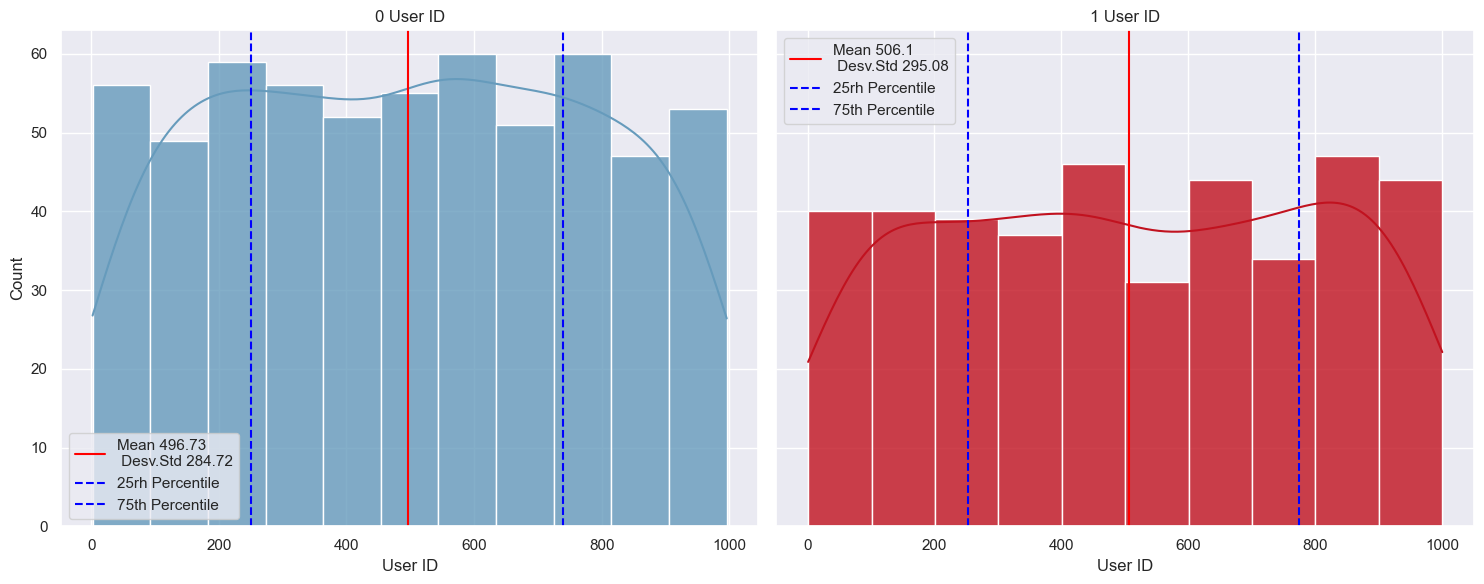

In [63]:
Purchased_color = {1:colors[0], 0:colors[1]}
Purchased = data["Purchased"].unique()
# Crear DataFrames para cada especie
compra = data.loc[data["Purchased"]==1].copy()
no_compra = data.loc[data["Purchased"]==0].copy()
# Lista de DataFrames de cada especie
dfs = [no_compra,compra]

# Crear figura y ejes
fig, ax = plt.subplots(1, len(dfs), figsize=(15, 6),sharey=True)
# Iterar sobre los DataFrames y los ejes al mismo tiempo
for i, (purchased_df, purchased_name) in enumerate(zip(dfs, Purchased)):
    sns.histplot(ax=ax[i],
                 data= purchased_df,
                 x="User ID",
                 kde= True,
                 color = Purchased_color[purchased_name],
                 alpha = 0.8
                )
   # Añadir líneas verticales para la media y los percentiles
    mean = purchased_df["User ID"].mean()
    desv_std = purchased_df["User ID"].std()
    q25 = purchased_df["User ID"].quantile(0.25)
    q75 = purchased_df["User ID"].quantile(0.75)
    
    ax[i].axvline(x = mean, color= "red",label= f"Mean {round(mean,2)} \n Desv.Std {round(desv_std,2)}")
    ax[i].axvline(x = q25, color = "blue", linestyle = "--", label="25rh Percentile")
    ax[i].axvline(x = q75, color ="blue", linestyle = "--", label ="75th Percentile")
    
    ax[i].legend()
    ax[i].set_title(f"{purchased_name} User ID")
    ax[i].set_xlabel("User ID")
    ax[i].set_ylabel("Count")
    
plt.tight_layout()
plt.show()

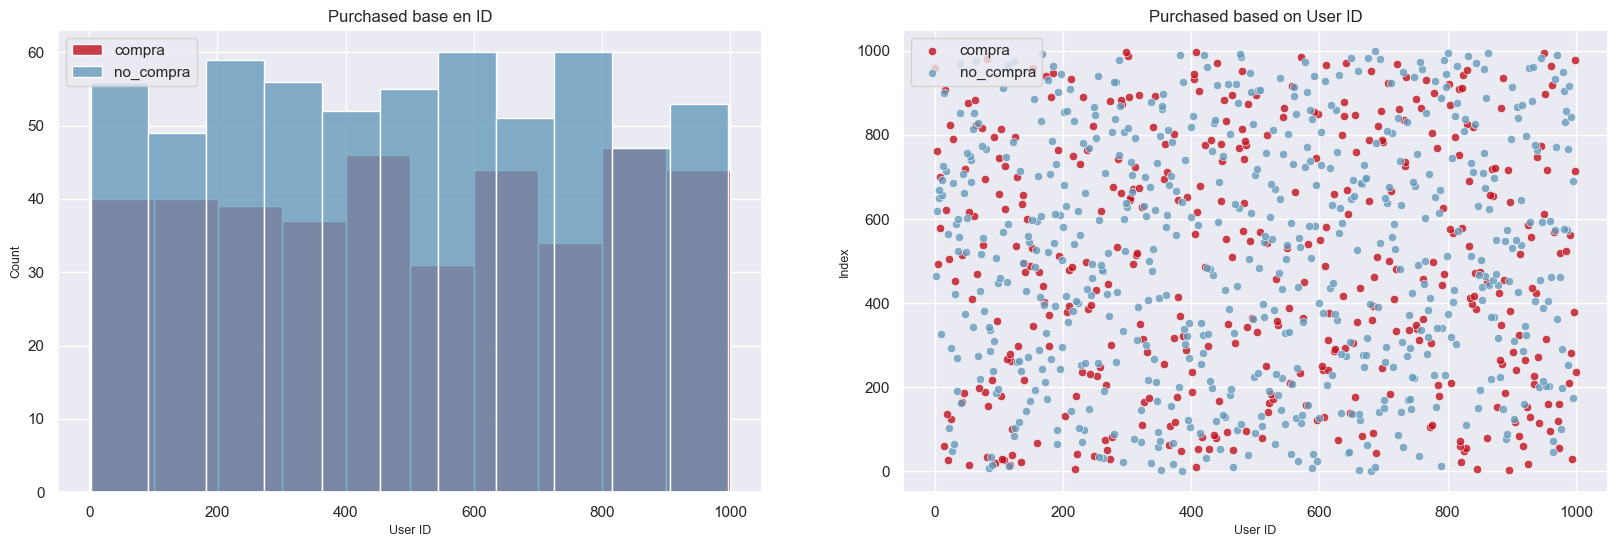

In [67]:

compra = data.loc[data["Purchased"]==1].copy()
no_compra = data.loc[data["Purchased"]==0].copy()

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(compra["User ID"],label="compra",fill=True,color=colors[0],alpha=0.8)
sns.histplot(no_compra["User ID"],label="no_compra",fill=True,color=colors[1],alpha=0.8)
plt.legend(loc = "upper left")
plt.ylabel("Count", fontsize=9)
plt.title("Purchased base en ID")
plt.xlabel("User ID", fontsize = 9)

# Scatterplot
plt.subplot(1, 2, 2)
sns.scatterplot(x=compra["User ID"], y=compra.index, label="compra", color=colors[0], alpha=0.8)
sns.scatterplot(x=no_compra["User ID"], y=no_compra.index, label="no_compra", color=colors[1], alpha=0.8)
plt.legend(loc="upper left")
plt.ylabel("Index", fontsize=9)  # Cambié 'Density' a 'Index'
plt.title("Purchased based on User ID")
plt.xlabel("User ID", fontsize=9)

plt.show()

#### 3_3 Analisis de la variable dependiente con dos o mas variable  categorica

### 4_Análisis de series de tiempo